# Plot Generator Extended Essay "A Quantitative Analysis of Homemade Sodium-Ion Batteries."

* Created on: 2022-10-28
* Last updated on: 2022-11-07

## Graphs
1. A current and voltage discharge curve for each battery over a set resistance $\mathrm{R}$, given in $\Omega$ and set time $\mathrm{T}$ given in minutes. The voltage $\mathrm{V}$ and the current $\mathrm{mA}$ are plotted against time $\mathrm{t} [s]$ in two distinct plots for each battery's discharge curve.
2. A bar chart for three batteries differing in construction displaying the charged and discharged voltage in $\mathrm{V}$ (volts), as well as the peak discharge current in $\mathrm{mA}$ (milli-ampere).
3. A bar chart displaying the data from [statista](https://www.statista.com/statistics/263437/global-smartphone-sales-to-end-users-since-2007/) on smartphone sales in the past 13 years.

## Setup and Imports

In [6]:
# import the modules we need
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# plotting style setup
# install science plots module
%pip install SciencePlots

plt.style.reload_library()
plt.style.use(['science','grid'])

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': False, 
    'pgf.rcfonts': False,
})

# set matplotlib params

matplotlib.rcParams.update({
    'figure.dpi': 200.0,
    'axes.grid' : True, 
    'axes.grid.axis':'both',
    'axes.grid.which': 'major',
    'xtick.minor.size': 0.1,
    'ytick.minor.size': 0.1,
    'xtick.major.size': 4.0,
    'ytick.major.size': 4.0,
    'axes.titlesize' : 'small',
    'axes.labelsize' : 'small',
    'axes.labelpad' : 2.0,
    'axes.xmargin': 0.0,
    'axes.ymargin': 0.2,
    'xtick.top': False,
    'ytick.right' : False,
    'axes.axisbelow':  True,  
    'axes.titleweight':'normal',
    'grid.alpha':1.0,
    'grid.linestyle': 'dashed',
    'grid.color': '#bfbfbf',
    'xtick.labelsize': 'small', 
    'xtick.direction': 'in', 
    'ytick.labelsize': 'small', 
    'ytick.direction': 'in',
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,  
    'legend.shadow':  False, 
    'legend.fontsize': 'small',
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.autolimit_mode' : 'data',
    'xtick.major.pad' : 4,
    'ytick.major.pad' : 3,
    'figure.frameon': True,
    'axes.formatter.use_locale': False
})

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Main Plotting Functions

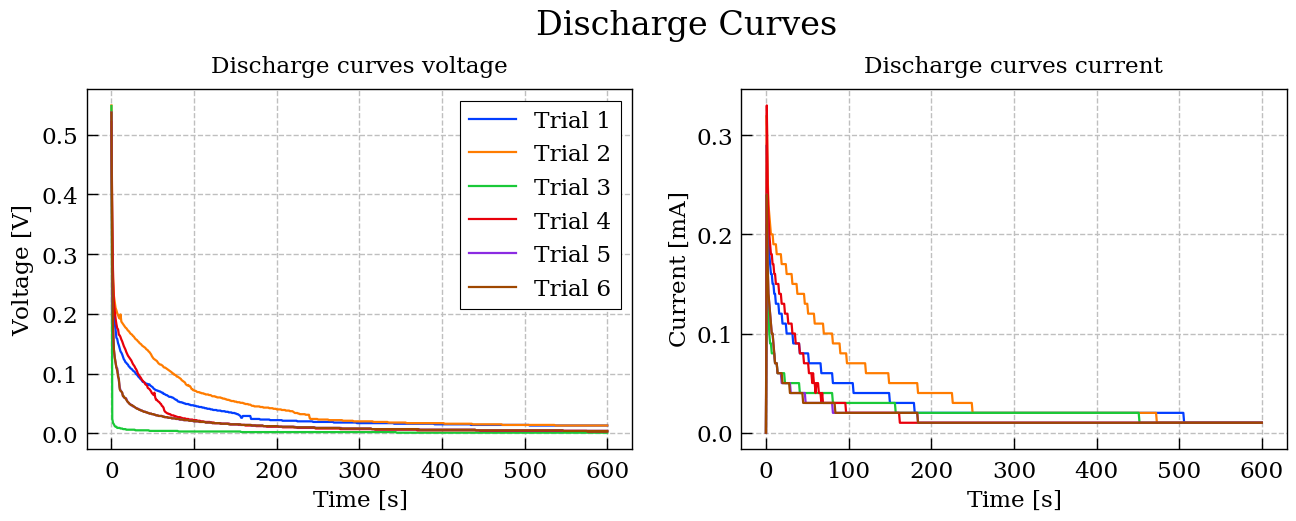

In [8]:
# load the data uploaded to session storage into a dataframe
def get_discharge_plots(datafilename, plotname):
    """function to load discharge data into a dataframe and plot discharge curves
    Args:
        filepath: path to xlsx file with discharge data (3 columns: timestep, voltage, current)
        trialname: name of trial used as figure title
    Returns:
        figure with discharge curve plots
    """
    # new figure with 2 subplots (vertical plots, horizontal plots)
    fig, axes = plt.subplots(1, 2)

    # flatten the axes
    axs = axes.flatten()

    # define the xlabel
    xlbl = r"$\mathrm{Time}$ $[\mathrm{s}]$"

    # define the label for voltage and current and save as ylabel
    ylbls = tuple([r"$\mathrm{Voltage}$ $[\mathrm{V}]$", r"$\mathrm{Current}$ $[\mathrm{mA}]$"])

    # set colors
    colors = sns.color_palette("bright").as_hex()
    # colors = ["red","green","blue","red","green","blue"]

    # trialname is the sheetname 
    trialnames = (["trial1","trial2","trial3","trial4","trial5","trial6"])
    trialnameslegend = tuple(["Trial 1","Trial 2","Trial 3","Trial 4","Trial 5","Trial 6"])
    for i, trial in enumerate(trialnames):
        trialdf = pd.read_excel(datafilename,sheet_name=trial)
        xdata, ydata_v, ydata_c = tuple([trialdf[col].to_numpy() for col in ["timestep","voltage","current"]])
        axs[0].plot(xdata,ydata_v,"-",color=colors[i],linewidth=0.8,alpha=1.0,label=trialnameslegend[i])
        axs[1].plot(xdata,ydata_c,"-",color=colors[i],linewidth=0.8,alpha=1.0,label=trialnameslegend[i])

    # define figure titles
    tits = tuple(["Discharge curves voltage", "Discharge curves current"])
    
    [ax.set_xlabel(xlbl) for ax in axs]
    [ax.set_ylabel(lbl) for ax, lbl in zip(axs, ylbls)]
    [ax.set_title(tit) for ax, tit in zip(axs, tits)]
    handles, labels = axs[0].get_legend_handles_labels()
    le = axs[0].legend(handles = handles, loc='upper right')
    frame = le.get_frame()
    frame.set_linewidth(0.4)
    fig.set_size_inches(6,2)
    fig.subplots_adjust(wspace=0.2,hspace=0.3,right=1.0,left=0.0,top=0.9,bottom=0.0)
    fig.suptitle(plotname,y=1.1)
    return fig

plt.rcParams.update({
    'figure.dpi': 200.0,
    'axes.grid' : True, 
    'axes.grid.axis':'both',
    'axes.grid.which': 'major',
    'xtick.minor.size': 0.1,
    'ytick.minor.size': 0.1,
    'xtick.major.size': 4.0,
    'ytick.major.size': 4.0,
    'axes.titlesize' : 'small',
    'axes.labelsize' : 'small',
    'axes.labelpad' : 2.0,
    'axes.xmargin': 0.05,
    'axes.ymargin': 0.05,
    'xtick.top': False,
    'ytick.right' : False,
    'axes.axisbelow':  True,  
    'axes.titleweight':'normal',
    'grid.alpha':1.0,
    'grid.linestyle': 'dashed',
    'grid.color': '#bfbfbf',
    'xtick.labelsize': 'small', 
    'xtick.direction': 'in', 
    'ytick.labelsize': 'small', 
    'ytick.direction': 'in',
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,  
    'legend.shadow':  False, 
    'legend.fontsize': 'small',
    'axes.spines.right' : True,
    'axes.spines.top' : True,
    'xtick.major.pad' : 4,
    'ytick.major.pad' : 3,
    'figure.frameon': True,
    'axes.formatter.use_locale': False
})

# calling the function on a single trial dataset
plotname = "Discharge Curves"
discharge_fig = get_discharge_plots("graph_data.xlsx", plotname)
discharge_fig.savefig('output/dischargefig.eps', format='eps', dpi = 200)
discharge_fig.savefig('output/dischargefig.png', format='png', dpi = 200)

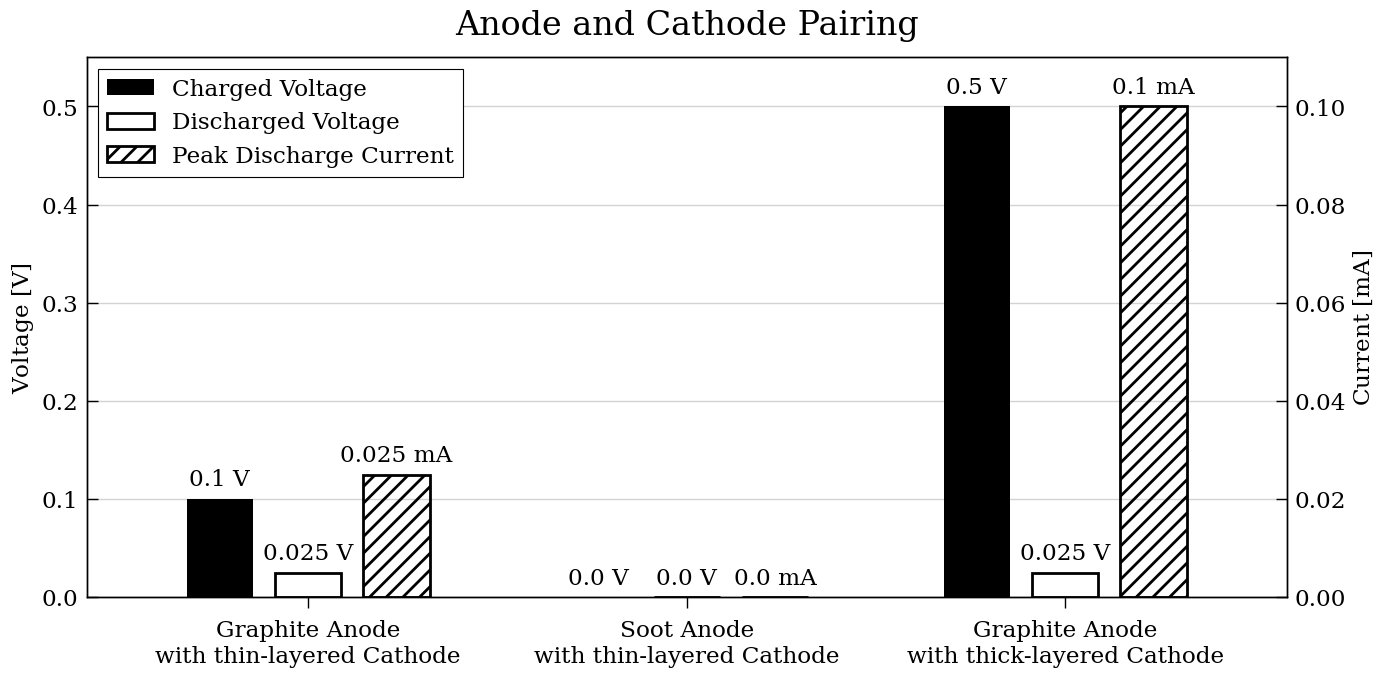

In [9]:
def get_bat_plots():
    """function to create a bar chart from the defined data
    Args:
    Returns:
        figure with bar charts
    """
    trialnames = tuple(["Graphite Anode\nwith thin-layered Cathode","Soot Anode\nwith thin-layered Cathode","Graphite Anode\nwith thick-layered Cathode"])
    y_a = np.array([0.1,0,0.5]) # charged voltage
    y_b = np.array([0.025,0,0.025]) # discharged voltage
    y_c = np.array([0.025,0,0.1]) # peak discharge current
    x = np.arange(len(trialnames))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 2*width/3, y_a, width/2, color="black",label="Charged Voltage")
    rects2 = ax.bar(x, y_b, width/2, fill=False,edgecolor="black",label="Discharged Voltage")

    ax.set_ylabel(r"$\mathrm{Voltage}$ $[\mathrm{V}]$")

    def bar_label(myax, rects, einheit):
        for rect in rects:
            height = rect.get_height()
            myax.annotate(f'{height} {einheit}',
                          xy=(rect.get_x() + rect.get_width() / 2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom', fontsize='small')
    bar_label(ax,rects1,"V")
    bar_label(ax,rects2,"V")

    ax2 = ax.twinx()
    rects3 = ax2.bar(x + 2*width/3, y_c, width/2, fill=False, hatch="////",color="red",label="Peak Discharge Current")
    ax2.set_ylabel(r"$\mathrm{Current}$ $[\mathrm{mA}]$")

    bar_label(ax2,rects3,"mA")
    ax.set_xticks(x)
    ax.set_xticklabels(trialnames)

    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    le = ax.legend(handles = handles, loc='upper left')
    frame = le.get_frame()
    frame.set_linewidth(0.4)

    ax.xaxis.grid(False) # hide the vertical grid
    ax.yaxis.grid(linestyle='-', which='major', color='lightgrey',alpha=1.0)
    ax2.yaxis.grid(False)
    fig.set_size_inches(6,3)
    fig.subplots_adjust(wspace=0.2,hspace=0.3,right=1.0,left=0.0,top=0.9,bottom=0.0)
    fig.suptitle("Anode and Cathode Pairing")
    return fig

plt.rcParams.update({
    'figure.dpi': 200.0,
    'axes.grid' : True, 
    'axes.grid.axis':'both',
    'axes.grid.which': 'major',
    'xtick.minor.size': 0.1,
    'ytick.minor.size': 0.1,
    'xtick.major.size': 4.0,
    'ytick.major.size': 4.0,
    'axes.titlesize' : 'small',
    'axes.labelsize' : 'small',
    'axes.labelpad' : 2.0,
    'axes.xmargin': 0.1,
    'axes.ymargin': 0.1,
    'xtick.top': False,
    'ytick.right' : True,
    'axes.axisbelow':  True,  
    'axes.titleweight':'normal',
    'grid.alpha':1.0,
    'grid.linestyle': 'dashed',
    'grid.color': '#bfbfbf',
    'xtick.labelsize': 'small', 
    'xtick.direction': 'out', 
    'ytick.labelsize': 'small', 
    'ytick.direction': 'in',
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,  
    'legend.shadow':  False, 
    'legend.fontsize': 'small',
    'axes.spines.right' : True,
    'axes.spines.top' : True,
    'xtick.major.pad' : 4,
    'ytick.major.pad' : 3,
    'figure.frameon': True,
    'figure.titleweight': 'normal',
    'axes.formatter.use_locale': False
})


batteryfig = get_bat_plots()
batteryfig.savefig('output/batteryfig.eps', format='eps', dpi = 200)
batteryfig.savefig('output/batteryfig.png', format='png', dpi = 200)

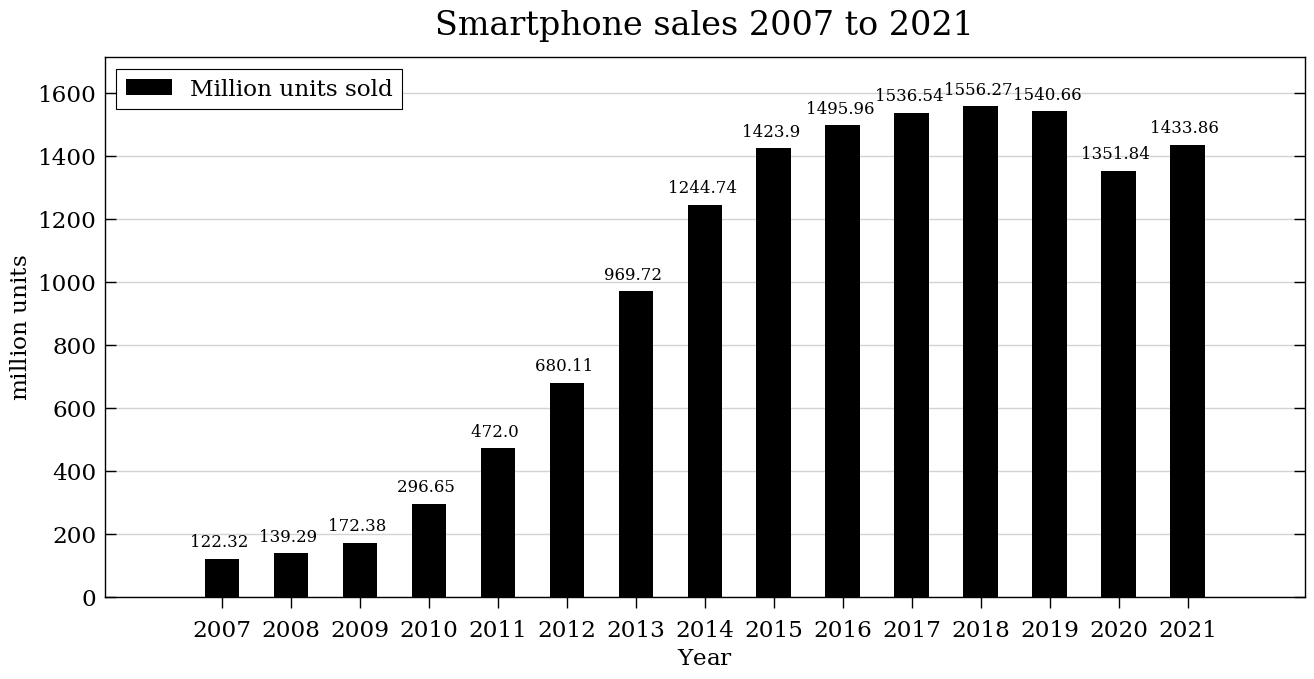

In [10]:
def get_phone_plots():
    """function to create a bar chart from the defined data
    Args:
    Returns:
        figure with bar charts
    """
    trialnames = tuple(["2007","2008","2009","2010","2011","2012","2013",
                        "2014","2015","2016","2017","2018","2019","2020","2021"]) # years
    y_a = np.array([122.32, 139.29, 172.38, 296.65, 472, 680.11, 969.72, 1244.74, 
                    1423.9, 1495.96, 1536.54, 1556.27, 1540.66, 1351.84, 1433.86]) # units sold
    x = np.arange(len(trialnames))
    width = 1
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y_a, width/2, color="black", label="Million units sold")
    
    ax.set_xlabel(r"$\mathrm{Year}$")
    ax.set_ylabel(r"$\mathrm{million}$ $\mathrm{units}$")

    def bar_label(myax, rects, einheit):
        for rect in rects:
            height = rect.get_height()
            myax.annotate(f'{height} {einheit}',
                          xy=(rect.get_x() + rect.get_width() / 2, height),
                          xytext=(0, 3),  # 3 points vertical offset
                          textcoords="offset points",
                          ha='center', va='bottom', fontsize=6)
    bar_label(ax, rects1, "")

    ax.set_xticks(x)
    ax.set_xticklabels(trialnames)

    handles, labels = ax.get_legend_handles_labels()
    le = ax.legend(handles = handles, loc='upper left')
    frame = le.get_frame()
    frame.set_linewidth(0.4)

    ax.xaxis.grid(False) # hide the vertical grid
    ax.yaxis.grid(linestyle='-', which='major', color='lightgrey',alpha=1.0)
    fig.set_size_inches(6,3)
    fig.subplots_adjust(wspace=0.2,hspace=0.3,right=1.0,left=0.0,top=0.9,bottom=0.0)
    fig.suptitle("Smartphone sales 2007 to 2021")
    return fig

plt.rcParams.update({
    'figure.dpi': 200.0,
    'axes.grid' : True, 
    'axes.grid.axis':'both',
    'axes.grid.which': 'major',
    'xtick.minor.size': 0.1,
    'ytick.minor.size': 0.1,
    'xtick.major.size': 4.0,
    'ytick.major.size': 4.0,
    'axes.titlesize' : 'small',
    'axes.labelsize' : 'small',
    'axes.labelpad' : 2.0,
    'axes.xmargin': 0.1,
    'axes.ymargin': 0.1,
    'xtick.top': False,
    'ytick.right' : True,
    'axes.axisbelow':  True,  
    'axes.titleweight':'normal',
    'grid.alpha':1.0,
    'grid.linestyle': 'dashed',
    'grid.color': '#bfbfbf',
    'xtick.labelsize': 'small', 
    'xtick.direction': 'out', 
    'ytick.labelsize': 'small', 
    'ytick.direction': 'in',
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,  
    'legend.shadow':  False, 
    'legend.fontsize': 'small',
    'axes.spines.right' : True,
    'axes.spines.top' : True,
    'xtick.major.pad' : 4,
    'ytick.major.pad' : 3,
    'figure.frameon': True,
    'figure.titleweight': 'normal',
    'axes.formatter.use_locale': False
})


batteryfig = get_phone_plots()
batteryfig.savefig('output/phonesales.eps', format='eps', dpi = 200)
batteryfig.savefig('output/phonesales.png', format='png', dpi = 200)